In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
from google.colab import files
uploaded = files.upload()
filepath = '/content/'+list(uploaded.keys())[0]
data = pd.read_csv(filepath)
df = data.copy()

Saving IC50_bioactivity_lipinski_binary.csv to IC50_bioactivity_lipinski_binary (1).csv


In [ ]:
print(df.shape)
df.head()

(306, 12)


,Molecule ChEMBL ID,Molecule Name,Molecular Weight,#RO5 Violations,Smiles,Standard_Value,MW,LogP,NumHDonors,NumHAcceptors,Bioactivity,Class
0,CHEMBL105712,PHENACYL CHLORIDE,154.60,0,O=C(CCl)c1ccccc1,190,154.596,2.10810,0,1,Active,1
1,CHEMBL1092796,IGUESTERIN,404.59,1,CC1=CC[C@]2(C)CC[C@]3(C)C4=CC=C5C(=CC(=O)C(O)=...,2600,404.594,7.16300,1,2,Active,1
2,CHEMBL1092797,DIHYDROCELASTROL,452.64,1,Cc1c(O)c(O)cc2c1CC=C1[C@@]3(C)CC[C@@]4(C)CC[C@...,21700,452.635,6.64392,3,3,Inactive,0
3,CHEMBL1096979,BENSERAZIDE,257.25,1,NC(CO)C(=O)NNCc1ccc(O)c(O)c1O,140,257.246,-1.75620,7,7,Active,1
4,CHEMBL111654,2-MERCAPTOBENZOTHIAZOLE,167.26,0,Sc1nc2ccccc2s1,1740,167.258,2.58500,1,3,Active,1


In [ ]:
df2 = df.copy()
df2 = df2.drop(['Molecule ChEMBL ID','Molecule Name','Molecular Weight','Smiles','Standard_Value','#RO5 Violations','Bioactivity'], axis=1)
print(df2.shape)
df2.head()

(306, 5)


,MW,LogP,NumHDonors,NumHAcceptors,Class
0,154.596,2.10810,0,1,1
1,404.594,7.16300,1,2,1
2,452.635,6.64392,3,3,0
3,257.246,-1.75620,7,7,1
4,167.258,2.58500,1,3,1


In [ ]:
X = df2.drop(['Class'], axis=1)


In [ ]:
X.head()

,MW,LogP,NumHDonors,NumHAcceptors
0,154.596,2.10810,0,1
1,404.594,7.16300,1,2
2,452.635,6.64392,3,3
3,257.246,-1.75620,7,7
4,167.258,2.58500,1,3


In [ ]:
y = df2['Class'].astype("category")
#y

In [ ]:
#y_enc

In [ ]:
!pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =1)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models
#predictions

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
100%|██████████| 29/29 [00:01<00:00, 22.27it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.76,0.76,0.76,0.76,0.02
QuadraticDiscriminantAnalysis,0.76,0.75,0.75,0.76,0.01
ExtraTreesClassifier,0.74,0.74,0.74,0.74,0.16
GaussianNB,0.74,0.73,0.73,0.74,0.02
RandomForestClassifier,0.73,0.72,0.72,0.73,0.19
LabelSpreading,0.73,0.72,0.72,0.72,0.03
LGBMClassifier,0.71,0.71,0.71,0.71,0.04
ExtraTreeClassifier,0.71,0.71,0.71,0.71,0.03
Perceptron,0.71,0.71,0.71,0.71,0.01


[(0.0, 1.0)]

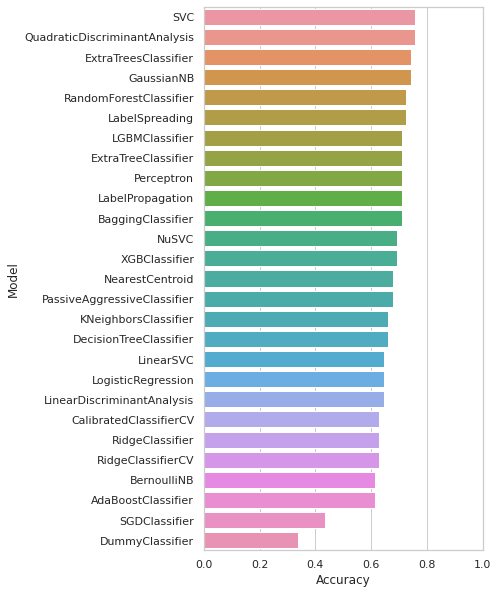

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred_class = clf.predict(X_test)

y_pred_class

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0])

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        33
           1       0.78      0.72      0.75        29

    accuracy                           0.77        62
   macro avg       0.77      0.77      0.77        62
weighted avg       0.77      0.77      0.77        62



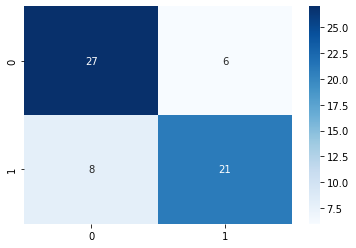

In [ ]:
from numpy.testing._private.utils import nulp_diff
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


cf_matrix = confusion_matrix(y_test , y_pred_class)
sns.heatmap(cf_matrix, annot=True, cmap='Blues') 

print(classification_report(y_test , y_pred_class))